# importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB

from xgboost import XGBClassifier



In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/content/1429_1.csv")

In [4]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

 EDA

In [6]:
data = df[["reviews.text","reviews.rating"]]
data.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    34659 non-null  object 
 1   reviews.rating  34627 non-null  float64
dtypes: float64(1), object(1)
memory usage: 541.7+ KB


In [8]:
# drop missing values
data.dropna(inplace=True)
data.isnull().sum()

reviews.text      0
reviews.rating    0
dtype: int64

In [9]:
# explore some of the reviews
import random

n_samples = 5

for _ in range(n_samples):
    i = random.choice(range(data.shape[0]))
    print(f"REVIEW TEXT:\n{data['reviews.text'][i]} \n\nRATE:\n{data['reviews.rating'][i]}")
    print('\n', 90*"-", '\n')

REVIEW TEXT:
We bought this for our son when he went to college. He is able to upload all of his books and other documents. 

RATE:
5.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
Purchased as a gift. They love it and I loved the price. Lower than Amazon! 

RATE:
5.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
It hasnt given me any problems much better than the last one i purchased love amazon 

RATE:
5.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
Even when I’m outside in bright sunlight, the words of the book I’m reading are still crystal clear. That alone makes the Kindle Oasis worth what it cost me.The Kindle Oasis wakes up in just seconds, and any book I choose instantly opens, ready to be read.It is the perfect size and isn’t heavy or bulky. I really do read for hours at a time. Sometimes I 

In [10]:
# descriptive statistics
data.describe()

,reviews.rating
count,34626.000000
mean,4.584561
std,0.735660
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [11]:
# distribution of rating
data['reviews.rating'].value_counts().sort_index(ascending=False)

5.0    23774
4.0     8541
3.0     1499
2.0      402
1.0      410
Name: reviews.rating, dtype: int64

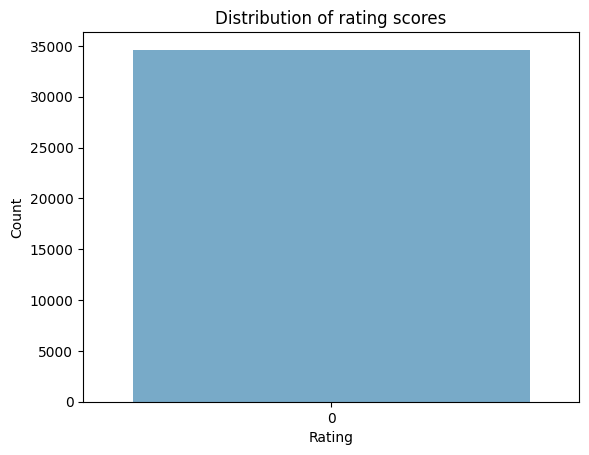

In [12]:
# distribution of rating
sns.countplot(data['reviews.rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [19]:
# map ratings 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1 (POSITIVE)
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}


# mapping
data['sentiment_score'] = data['reviews.rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()

,reviews.text,reviews.rating,sentiment_score,sentiment
0,This product so far has not disappointed. My c...,5.0,1,POSITIVE
1,great for beginner or experienced person. Boug...,5.0,1,POSITIVE
2,Inexpensive tablet for him to use and learn on...,5.0,1,POSITIVE
3,I've had my Fire HD 8 two weeks now and I love...,4.0,1,POSITIVE
4,I bought this for my grand daughter when she c...,5.0,1,POSITIVE


In [20]:
# distribution of rating
data['reviews.rating'].value_counts().sort_index(ascending=False)

5.0    23774
4.0     8541
3.0     1499
2.0      402
1.0      410
Name: reviews.rating, dtype: int64

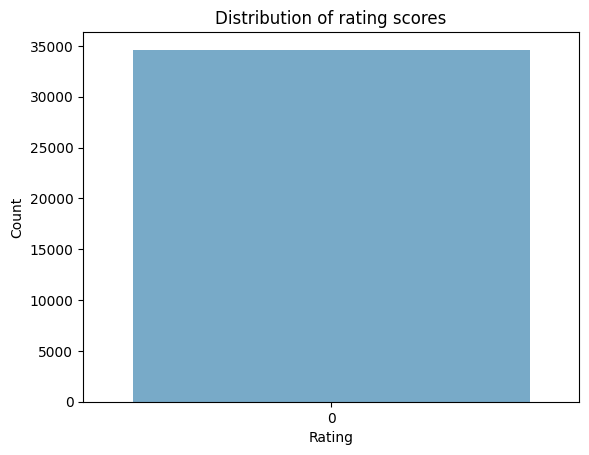

In [21]:
# distribution of rating
sns.countplot(data['reviews.rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [22]:
# map ratings 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1 (POSITIVE)
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}


# mapping
data['sentiment_score'] = data['reviews.rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()

,reviews.text,reviews.rating,sentiment_score,sentiment
0,This product so far has not disappointed. My c...,5.0,1,POSITIVE
1,great for beginner or experienced person. Boug...,5.0,1,POSITIVE
2,Inexpensive tablet for him to use and learn on...,5.0,1,POSITIVE
3,I've had my Fire HD 8 two weeks now and I love...,4.0,1,POSITIVE
4,I bought this for my grand daughter when she c...,5.0,1,POSITIVE


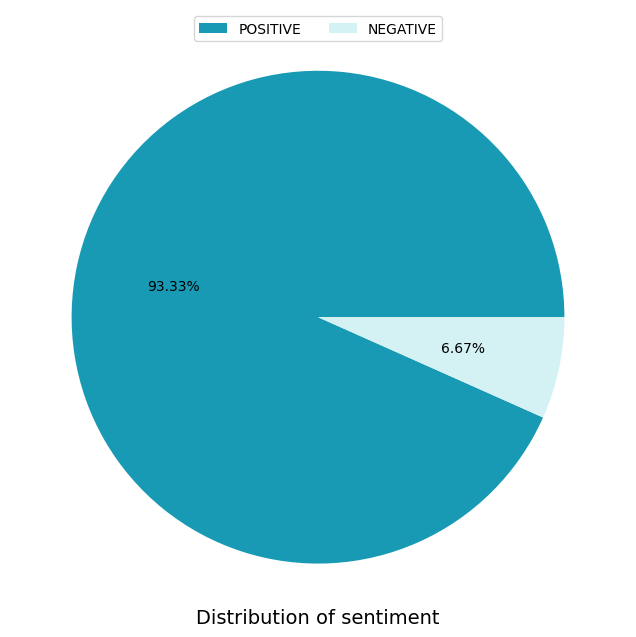

In [23]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()


Most used words

All Reviews

In [24]:
# get all used words
all_words = pd.Series(' '.join(data['reviews.text']).split())

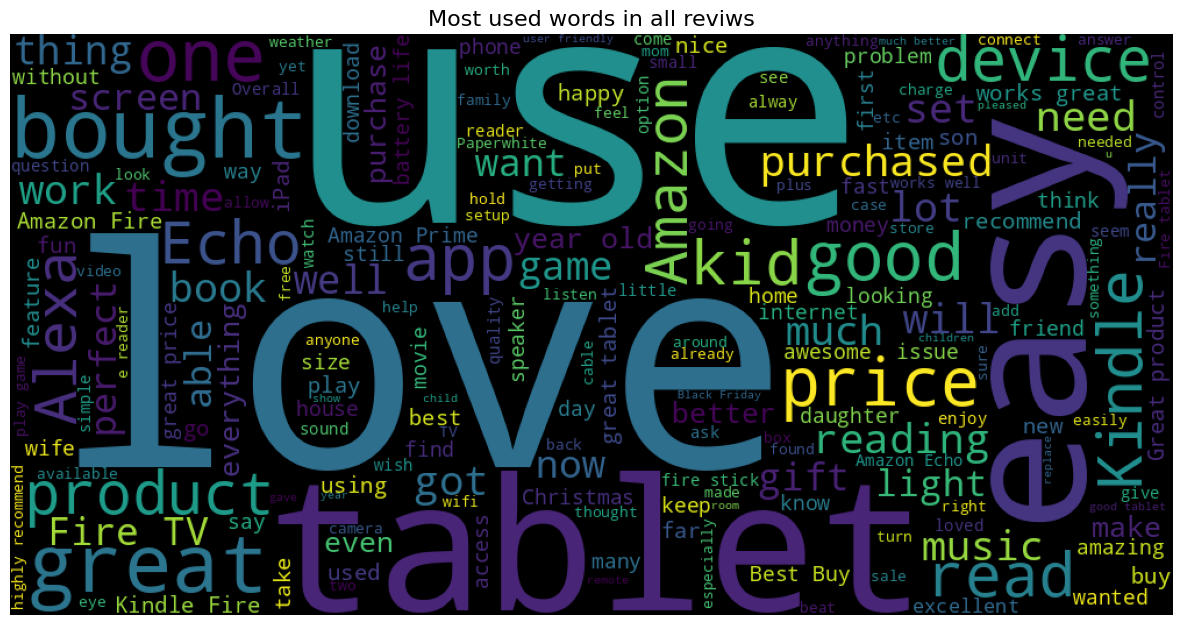

In [25]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all reviws", size=16)

plt.axis("off")
plt.show()

positive Reviews

In [26]:
# get words used positive reivews
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['reviews.text']).split())

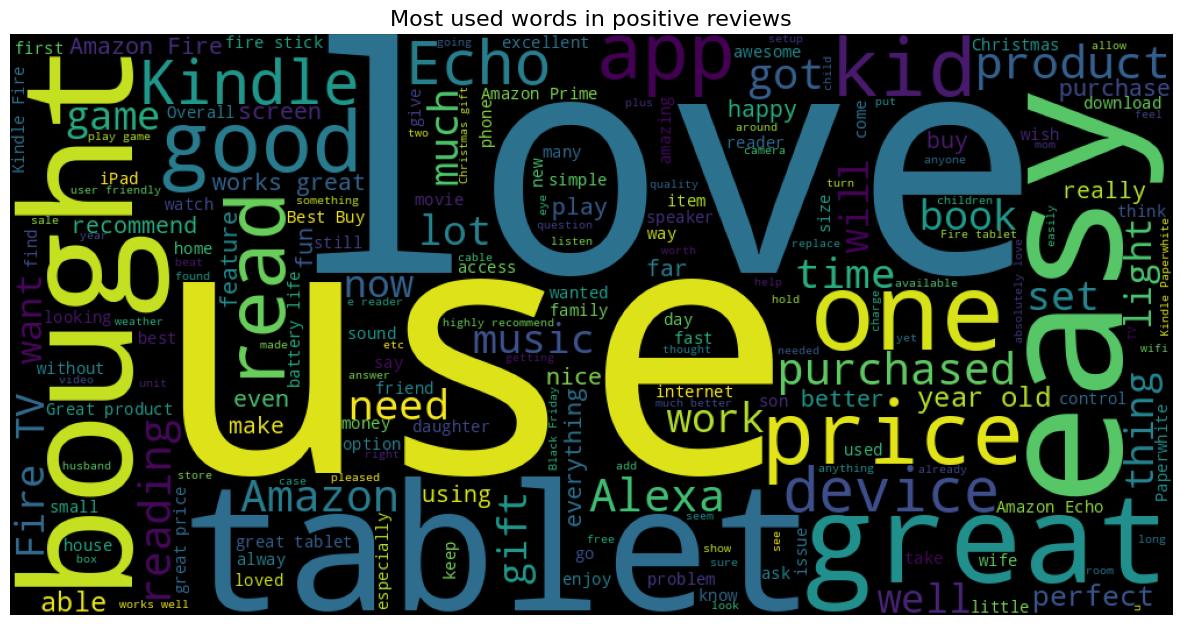

In [27]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in positive reviews", size=16)

plt.axis("off")
plt.show()

Negative Reviews

In [28]:
# get words used negative reivews
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['reviews.text']).split())

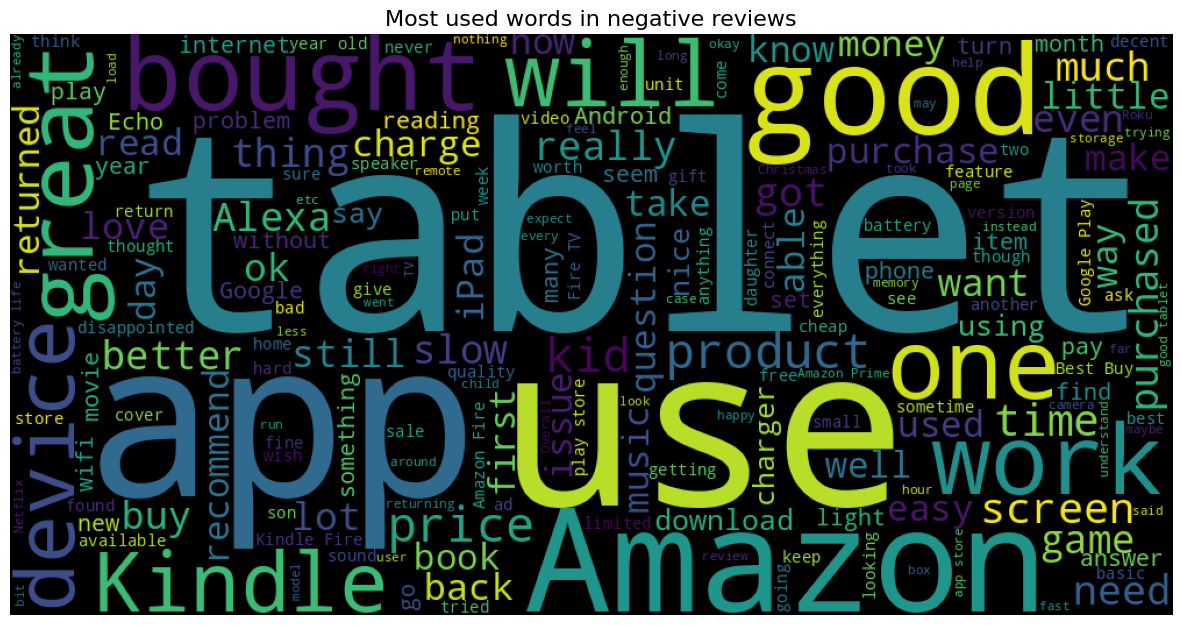

In [29]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in negative reviews", size=16)

plt.axis("off")
plt.show()

Text Processing

1. Clean Text

We will go over some simple techniques to clean and prepare text data for modeling with machine learning.

In [30]:
def clean_text(text:str):
    """ Return cleaned text:
            - lowercase
            - remove whitespaces
            - remove HTML tags
            - replace digit with spaces
            - replace punctuations with spaces
            - remove extra spaces and tabs
        ------
        input: text (str)
        output: cleaned text (str)
    """
    text = str(text)

    text = text.lower()
    text = text.strip()

    text = re.sub(' \d+', ' ', text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)

    text = text.strip()

    return text

In [31]:
# test
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
clean_text(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'this is a message to be cleaned it may involve some things like adjacent spaces and tabs'



2. Remove Stopwords

There can be some words in our sentences that occur very frequently and don't contribute too much to the overall meaning of the sentences. We usually have a list of these words and remove them from each our sentences. For example: "a", "an", "the", "this", "that", "is", "it", "to", "and" in this example.


In [32]:
def remove_stopwords(text:str):
    """ Remove stopwords from text:
        ------
        input: text (str)
        output: cleaned text (str)
    """
    text = str(text)
    filtered_sentence = []

    # Stop word lists can be adjusted for your problem
    stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)

    return text

In [36]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [37]:
# test
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_text(text)
remove_stopwords(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'message be cleaned may involve some things like adjacent spaces tabs'



3. Stemming

Stemming is a rule-based system to convert words into their root form. It removes suffixes from words. This helps us enhace similarities (if any) between sentences.

Example:

    "jumping", "jumped" -> "jump"

    "cars" -> "car"



In [38]:


def stemm_text(text:str):
    """ Stemm text:
    ------
    input: text (str)
    output: Stemmed text (str)
    """
    text = str(text)
    # Initialize the stemmer
    snow = SnowballStemmer('english')

    stemmed_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        # Stem the word/token
        stemmed_sentence.append(snow.stem(w))
    text = " ".join(stemmed_sentence)

    return text



In [39]:
# test
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_text(text)
text = remove_stopwords(text)
stemm_text(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'messag be clean may involv some thing like adjac space tab'



4. Lemmatization

If we are not satisfied with the result of stemming, we can use the Lemmatization instead. It usually requires more work, but gives better results. As mentioned in the class, lemmatization needs to know the correct word position tags such as "noun", "verb", "adjective", etc. and we will use another NLTK function to feed this information to the lemmatizer

In [40]:


# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN



In [41]:
def lemmatize(text:str):
    """ lemmatize text:
    ------
    input: text (str)
    output: lemmatized text (str)
    """
    text = str(text)

    # Initialize the lemmatizer
    wl = WordNetLemmatizer()

    lemmatized_sentence = []

    # Tokenize the sentence
    words = word_tokenize(text)
    # Get position tags
    word_pos_tags = nltk.pos_tag(words)
    # Map the position tag and lemmatize the word/token
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    lemmatized_text = " ".join(lemmatized_sentence)

    return lemmatized_text

In [46]:
# test
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_text(text)
text = remove_stopwords(text)
# text = stemm_text(text)
lemmatize(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'message be clean may involve some thing like adjacent space tabs'

In [43]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [45]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Apply text processing functions

In [47]:
# clean text
data['text'] = data['reviews.text'].apply(clean_text)
# remove stopwords
data['text'] = data['text'].apply(remove_stopwords)
# lemmatize
data['text'] = data['text'].apply(lemmatize)

In [48]:
# check some processed reviews
import random

i = random.choice(range(len(data)))

print(f"Original review: \n{data['reviews.text'].iloc[i]}\n")
print(f"Processed review: \n{data['text'].iloc[i]}")

Original review: 
Enjoy listening to music, playing games, getting weather, and hearing news updates while I am working in the kitchen. Great speaker. I only wish we could change her name... I have added the tap and echo to our home as well. Also purchased one as a gift for my son.

Processed review: 
enjoy listen music playing game get weather hear news update while i be work in kitchen great speaker i only wish we could change her name i have add tap echo our home as well also purchase one a gift for my son


In [49]:
# export cleaned data to csv
data.to_csv('cleaned_data.csv', index=False)

In [50]:
data = pd.read_csv('cleaned_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34626 entries, 0 to 34625
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviews.text     34626 non-null  object 
 1   reviews.rating   34626 non-null  float64
 2   sentiment_score  34626 non-null  int64  
 3   sentiment        34626 non-null  object 
 4   text             34625 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ MB


In [51]:
data[data['text'].isnull()]

,reviews.text,reviews.rating,sentiment_score,sentiment,text
9681,.................................................,5.0,1,POSITIVE,NaN


In [52]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34625 entries, 0 to 34625
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviews.text     34625 non-null  object 
 1   reviews.rating   34625 non-null  float64
 2   sentiment_score  34625 non-null  int64  
 3   sentiment        34625 non-null  object 
 4   text             34625 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.6+ MB


Feature Engineering and Selection


Create TF-IDF

In [53]:
vectorizer = TfidfVectorizer(max_features=700)
vectorizer.fit(data['text'])
features = vectorizer.transform(data['text'])

features.toarray()

array([[0.        , 0.31563924, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [56]:
tf_idf = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names_out())
tf_idf.head()


,50,ability,able,about,absolutely,access,account,actually,ad,add,...,would,wouldn,wrong,year,yet,you,young,your,youtube,yr
0,0.0,0.315639,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.113478,0.0,0.0,0.128257,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.075198,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.117837,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.069089,0.0,0.0,0.0,0.0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf, data['sentiment_score'], test_size=0.2, random_state=42)

print (f'Train set shape\t:{X_train.shape}\nTest set shape\t:{X_test.shape}')

Train set shape	:(27700, 700)
Test set shape	:(6925, 700)


In [58]:
yy = pd.DataFrame(y_train)
train_data = pd.concat([X_train, yy],axis=1)
train_data.head()

,50,ability,able,about,absolutely,access,account,actually,ad,add,...,wouldn,wrong,year,yet,you,young,your,youtube,yr,sentiment_score
24523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.12826,0.0,0.0,0.0,0.0,1.0
30169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,1.0
13616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.224914,0.0,0.00000,0.0,0.0,0.0,0.0,1.0
17714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,1.0
5006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,1.0


Oversampling

In [59]:
train_data['sentiment_score'].value_counts()

1.0    25855
0.0     1845
Name: sentiment_score, dtype: int64

In [60]:
target_count = train_data['sentiment_score'].value_counts()
negative_class = train_data[train_data['sentiment_score'] == 0]
positive_class = train_data[train_data['sentiment_score'] == 1]

negative_over = negative_class.sample(target_count[1], replace=True)

df_train_over = pd.concat([positive_class, negative_over], axis=0)
df_train_over = shuffle(df_train_over)
df_train_over.head()

,50,ability,able,about,absolutely,access,account,actually,ad,add,...,wouldn,wrong,year,yet,you,young,your,youtube,yr,sentiment_score
2740,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29781,0.0,0.0,0.308364,0.0,0.0,0.348524,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11622,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8554,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13268,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
df_train_over.dropna(inplace=True)

In [62]:
df_train_over['sentiment_score'].value_counts()

0.0    22585
1.0    22123
Name: sentiment_score, dtype: int64

In [63]:


X_train = df_train_over.iloc[:,:-1]
y_train = df_train_over['sentiment_score']



Models

In [64]:
def modeling(Model, Xtrain = X_train, Xtest = X_test):
    """
    This function apply countVectorizer with machine learning algorithms.
    """

    # Instantiate the classifier: model
    model = Model

    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)

    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)

    # Assign f1 score to a variable
    print(classification_report(y_test, y_pred))
    print ('AUC ',roc_auc_score(y_test, y_pred))
    #cm = confusion_matrix(y_test, y_pred)
    confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['Actual'], colnames=['Predictions']).astype(int)
    plt.figure(figsize = (8,8))

    '''
    cmapGR = LinearSegmentedColormap.from_list(
        name='test',
        colors=['red','green']
    )
    '''
    sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='Blues').set_title('Confusion Matrix')

Naive bayes model

              precision    recall  f1-score   support

           0       0.17      0.80      0.27       466
           1       0.98      0.71      0.82      6459

    accuracy                           0.71      6925
   macro avg       0.57      0.75      0.55      6925
weighted avg       0.93      0.71      0.78      6925

AUC  0.7549026643463193


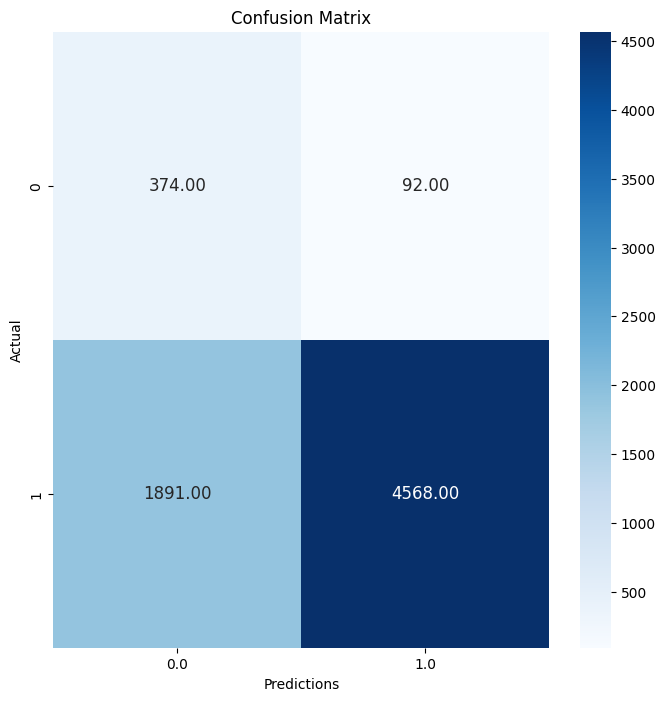

In [65]:
modeling(MultinomialNB())

XGBoost

              precision    recall  f1-score   support

           0       0.19      0.48      0.27       466
           1       0.96      0.85      0.90      6459

    accuracy                           0.82      6925
   macro avg       0.57      0.66      0.58      6925
weighted avg       0.91      0.82      0.86      6925

AUC  0.6640265404695315


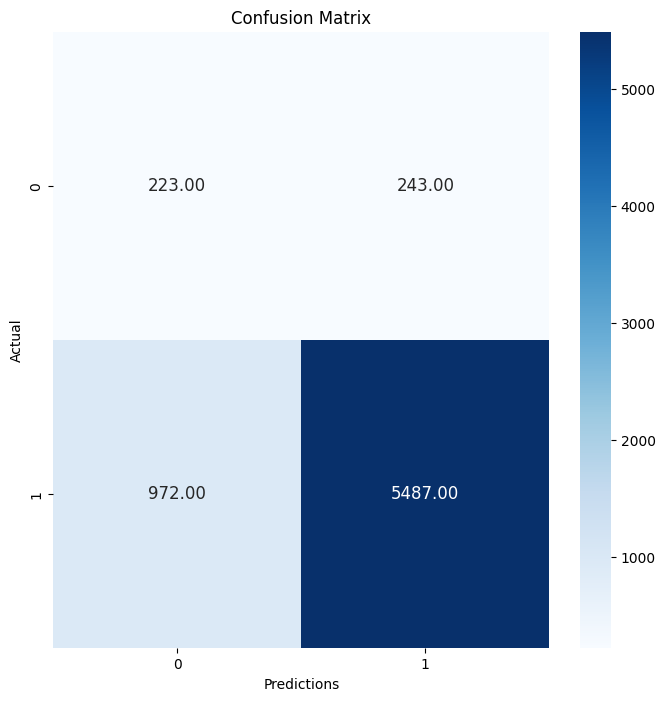

In [66]:
modeling(XGBClassifier());

In [67]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing import sequence

# Load the IMDB dataset
max_features = 20000  # Number of words to consider as features
max_len = 80  # Max sequence length
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

# Build the LSTM model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')



17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/5
625/625 [==============================] - 108s 168ms/step - loss: 0.4309 - accuracy: 0.7951 - val_loss: 0.3836 - val_accuracy: 0.8292
Epoch 2/5
625/625 [==============================] - 106s 169ms/step - loss: 0.2484 - accuracy: 0.9006 - val_loss: 0.3900 - val_accuracy: 0.8254
Epoch 3/5
625/625 [==============================] - 102s 163ms/step - loss: 0.1583 - accuracy: 0.9410 - val_loss: 0.5400 - val_accuracy: 0.8268
Epoch 4/5
625/625 [==============================] - 99s 158ms/step - loss: 0.0973 - accuracy: 0.9639 - val_loss: 0.6774 - val_accuracy: 0.8166
Epoch 5/5
782/782 [==============================] - 20s 25ms/step - loss: 0.6989 - accuracy: 0.8049
Test loss: 0.6989, Test accuracy: 0.8049
